$\huge \text{Synthetic Data Set}$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from timeit import default_timer as timer

In [ ]:
def compute_Q(A):
  n=len(A) # number of data points
  Q_matrix=np.matmul(A.T,A)/n
  return Q_matrix


In [ ]:
iteration_num=0
tolerance=1
matrix_decomposition=2
power_method=3

In [ ]:
def compute_principal_direc_power(A, tol=1e-6, max_iter=1000):
  n = A.shape[0]
  x = np.ones(n) / np.sqrt(n)
  delta = 1

  for i in range(max_iter):
      x_new = A @ x
      x_new = x_new / np.linalg.norm(x_new)
      delta = np.linalg.norm(x_new - x)
      x = x_new

      if delta < tol:
          break

  return x




In [ ]:
def compute_cosine(a,b):
  assert type(a) is np.ndarray and type(b) is np.ndarray
  return (np.dot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
# let's define a seed value
seed=34

In [ ]:

def guass_2d(mu,std,size):
  data=[]
  np.random.seed(seed)
  for i in range(size):
    x=np.random.normal(mu,std)
    y=np.random.normal(mu,std)
    data.append(x)
    data.append(y)
  return pd.DataFrame(np.array(data).reshape(size,2))




In [ ]:
data_1=guass_2d(0,1,200)
data_2=guass_2d(0,10,10)

In [ ]:
data=pd.concat([data_1,data_2]).reset_index( drop=True)

In [ ]:
data

,0,1
0,0.243835,-0.747318
1,-1.561177,-0.464253
2,-0.352062,-1.281492
3,0.289299,0.980029
4,0.477924,0.450818
...,...,...
205,7.524434,-5.105718
206,-7.057521,-4.243173
207,-2.321621,18.151405
208,-20.947494,10.359561


In [ ]:
mat=np.array(data[data.columns])

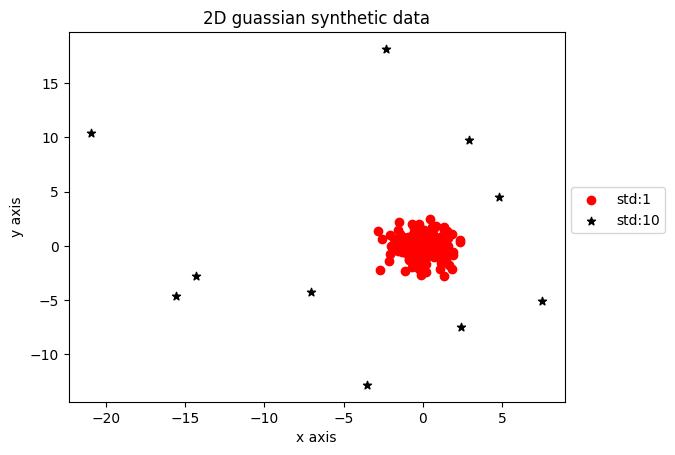

In [ ]:
plt.scatter(data_1[0],data_1[1],label='std:1',color='r',marker='o')
plt.scatter(data_2[0],data_2[1],label='std:10',color='k',marker='*')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('2D guassian synthetic data')
plt.legend(bbox_to_anchor=(1,0.6))
plt.show()


In [ ]:
Q_mat=compute_Q(mat)
prin_dir=compute_principal_direc_power(Q_mat)



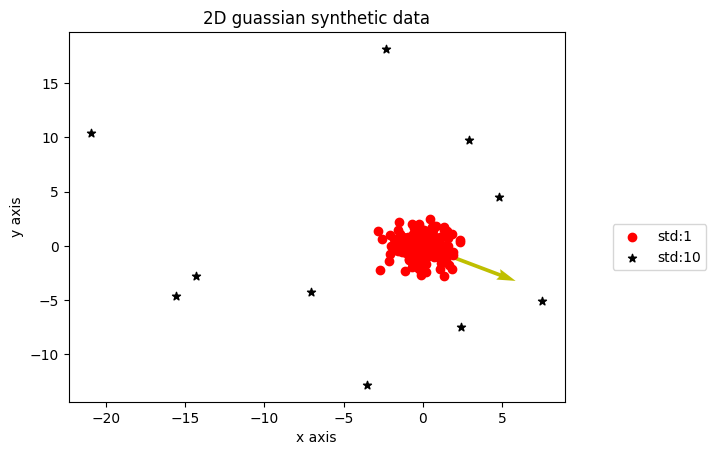

In [ ]:
plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5)
plt.scatter(data_1[0],data_1[1],label='std:1',color='r',marker='o')
plt.scatter(data_2[0],data_2[1],label='std:10',color='k',marker='*')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('2D guassian synthetic data')
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.show()

In [ ]:
data_rem=np.array(data.iloc[:-1]) # remove tha last instance which is coming from guass_2d(0,10) so we consider these data points as outlier
print('data shape when a data point is removed:',data_rem.shape,'inital data',data.shape)

# finding principal direction of ramaining data

Q_mat_rem=compute_Q(data_rem)
prin_dir_rem=compute_principal_direc_power(Q_mat_rem)

data shape when a data point is removed: (209, 2) inital data (210, 2)


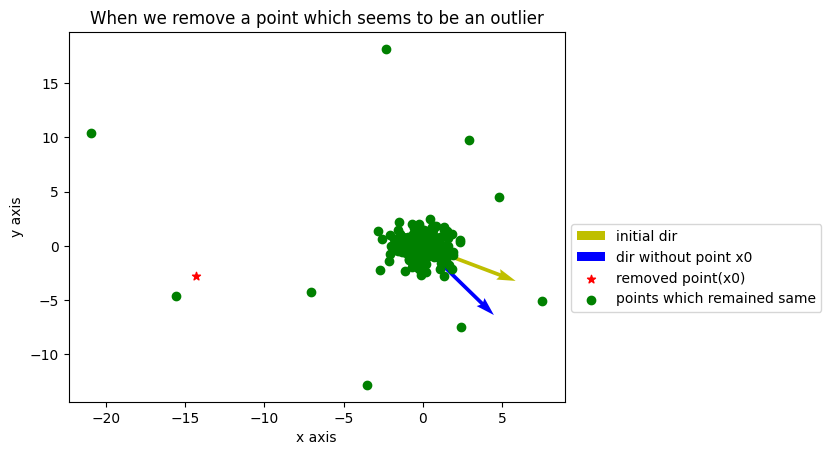

In [ ]:
# plotting the change in principal direction after removal of one data point(when removed point is of mean 0 and std 10)
plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0, prin_dir_rem[0], prin_dir_rem[1], color='b', scale=5,label='dir without point x0 ')
plt.scatter(data[0][-1:],data[1][-1:],color='r',marker='*',label='removed point(x0)')

plt.scatter(data[0][:-1],data[1][:-1],color='g',label='points which remained same')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('When we remove a point which seems to be an outlier')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
# removing a data point which have mean 0 and std 1
data_rem_1=np.array(data.drop(45))

# removing two data points one of mean 0 and std 1 and another is mean 0 and std 10
data_left=data.iloc[:-1].drop(45) # 45 is any random number chosen from the 2d data having mean 0 and std 1
print('data shapes:',data_rem_1.shape,'',data.shape,'', data_left.shape)

# finding prinicipal direction of left data

Q_mat_rem_1=compute_Q(data_rem_1)
prin_dir_rem_1=compute_principal_direc_power(Q_mat_rem_1)

data shapes: (209, 2)  (210, 2)  (208, 2)


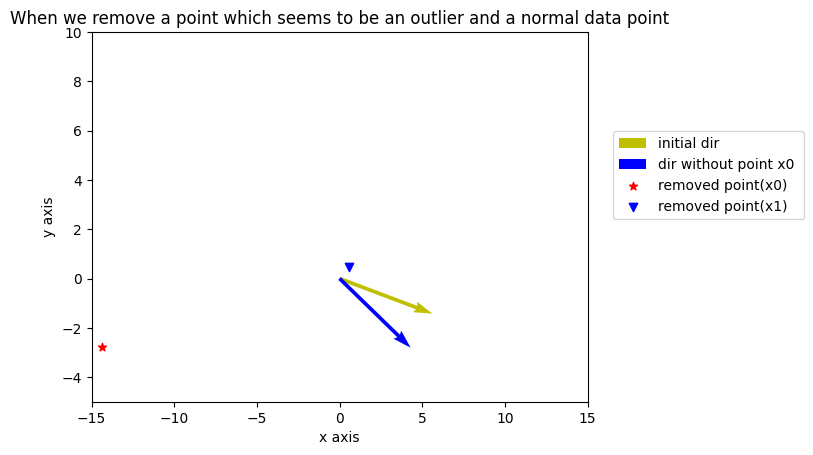

In [ ]:
# # plotting the change in principal direction after removal of two data point(when removed point is of mean 0 and std 10 and mean 0 and std 1 also)
plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0, prin_dir_rem[0], prin_dir_rem[1], color='b', scale=5,label='dir without point x0 ')
#plt.quiver(0, 0, prin_dir_rem_1[0], prin_dir_rem_1[1], color='k', scale=5,label='dir without point x1 ')
plt.scatter(data[0][-1:],data[1][-1:],color='r',marker='*',label='removed point(x0)')
plt.scatter(data[45:46][0],data[45:46][1],color='b',marker='v',label='removed point(x1)')


#plt.scatter(data_left[0],data_left[1],color='g',label='points which remained same')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-15,15)
plt.ylim((-5,10))
plt.title('When we remove a point which seems to be an outlier and a normal data point')
plt.legend(bbox_to_anchor=(1.45,0.75))
plt.show()

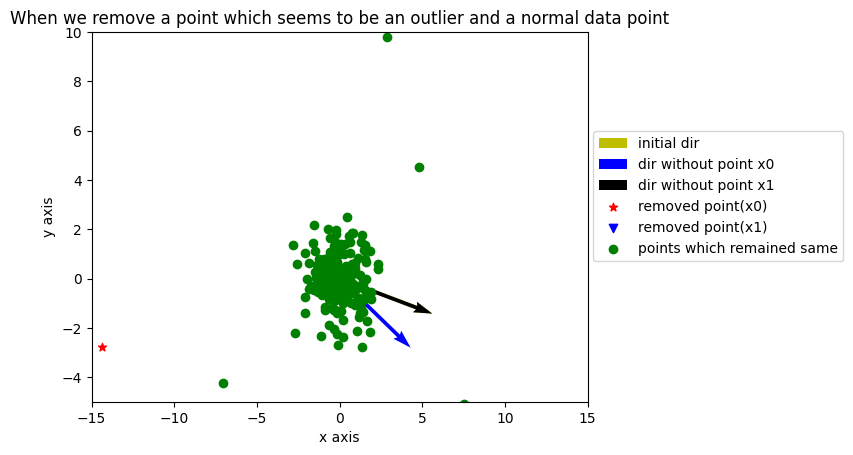

In [ ]:
# plotting the change in principal direction after removal of two data point(when removed point is of mean 0 and std 10 and mean 0 and std 1 also)

plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0, prin_dir_rem[0], prin_dir_rem[1], color='b', scale=5,label='dir without point x0 ')
plt.quiver(0, 0, prin_dir_rem_1[0], prin_dir_rem_1[1], color='k', scale=5,label='dir without point x1 ')
plt.scatter(data[0][-1:],data[1][-1:],color='r',marker='*',label='removed point(x0)')
plt.scatter(data[45:46][0],data[45:46][1],color='b',marker='v',label='removed point(x1)')

plt.scatter(data[0][:-1],data[1][:-1],color='g',label='points which remained same')
#plt.scatter(data_left[0],data_left[1],color='g',label='points which remained same')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-15,15)
plt.ylim((-5,10))
plt.title('When we remove a point which seems to be an outlier and a normal data point')
plt.legend(bbox_to_anchor=(1.53,0.75))
plt.show()

$\text{Here we can see that new principal direction of data when we removie the standard guassian data point , clearly overlaps the initial direction.}$

In [ ]:
# cosine similiraties
cosine_outlier=compute_cosine( prin_dir,prin_dir_rem)
cosine_normal=compute_cosine( prin_dir,prin_dir_rem_1)
print('cosine similiarity for outlier point:',cosine_outlier)
print('cosine similiarity for normal point:',cosine_normal)

cosine similiarity for outlier point: 0.9168520908394296
cosine similiarity for normal point: 0.999999576563063


In [ ]:
# outlier score
print('outlier score for outlier point:',abs(1-cosine_outlier))
print('outlier score for normal point:',abs(1-cosine_normal))

outlier score for outlier point: 0.08314790916057035
outlier score for normal point: 4.234369369582325e-07


$\large \text{As we can see that outlier score corresponding to outlier is much larger than normal instance.}$

In [ ]:
data_large_1=guass_2d(0,1,1000000)
data_large_2=guass_2d(0,10,100)
data_large=pd.concat([data_large_1,data_large_2]).reset_index( drop=True)

In [ ]:
data_large['label']=[1 for i in range(1000000)]+[0 for i in range(100)]

In [ ]:
data_large

,0,1,label
0,0.243835,-0.747318,1
1,-1.561177,-0.464253,1
2,-0.352062,-1.281492,1
3,0.289299,0.980029,1
4,0.477924,0.450818,1
...,...,...,...
1000095,10.851192,8.332475,0
1000096,-4.985805,2.969990,0
1000097,2.853970,-9.454233,0
1000098,9.983801,-4.398326,0


In [ ]:
len(data_large)

1000100

In [ ]:
mat_large=np.array(data_large[data_large.columns])

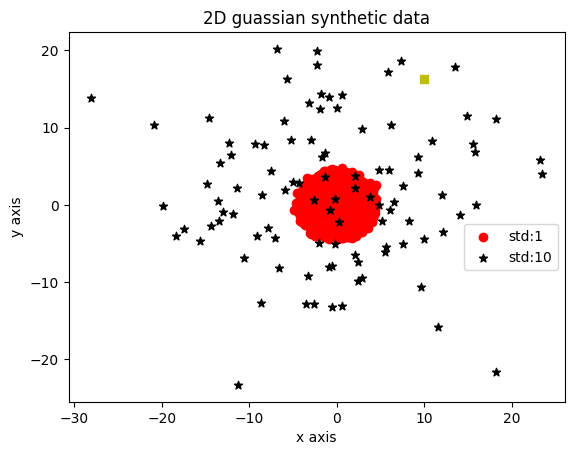

In [ ]:
np.random.seed(seed)
plt.scatter(data_large_1[0],data_large_1[1],label='std:1',color='r',marker='o')
plt.scatter(data_large_2.iloc[-1*np.random.randint(1,10)][0],data_large_2.iloc[-1*np.random.randint(1,10)][1],color='y',marker=',')
plt.scatter(data_large_2[0],data_large_2[1],label='std:10',color='k',marker='*')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('2D guassian synthetic data')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


In [ ]:
Q_mat=compute_Q(mat_large)
prin_dir=compute_principal_direc_power(Q_mat)

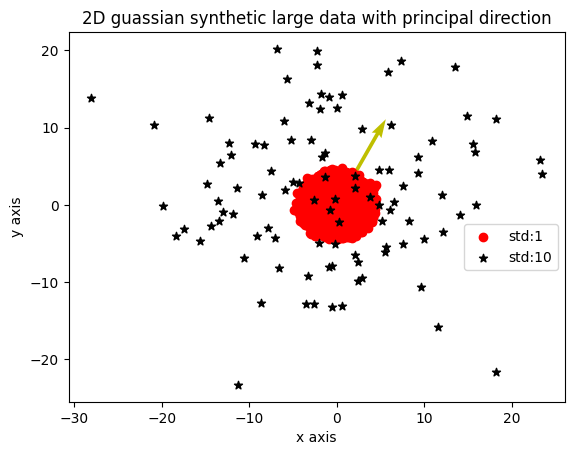

In [ ]:
plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5)
plt.scatter(data_large_1[0],data_large_1[1],label='std:1',color='r',marker='o')
plt.scatter(data_large_2[0],data_large_2[1],label='std:10',color='k',marker='*')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('2D guassian synthetic large data with principal direction')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
data_large.drop([len(data_large_1)+2])

,0,1,label
0,0.243835,-0.747318,1
1,-1.561177,-0.464253,1
2,-0.352062,-1.281492,1
3,0.289299,0.980029,1
4,0.477924,0.450818,1
...,...,...,...
1000095,10.851192,8.332475,0
1000096,-4.985805,2.969990,0
1000097,2.853970,-9.454233,0
1000098,9.983801,-4.398326,0


In [ ]:
np.random.seed(seed)
data_df=data_large.drop(len(data_large)-np.random.randint(1,10))
data_large_rem=np.array(data_df) # remove tha last instance which is coming from guass_2d(0,10) so we consider these data points as outlier
print('data shape when a data point is removed:',data_large_rem.shape,'inital data',data_large.shape)

# finding principal direction of ramaining data

Q_mat_rem=compute_Q(data_large_rem)
prin_dir_rem=compute_principal_direc_power(Q_mat_rem)

data shape when a data point is removed: (1000099, 3) inital data (1000100, 3)


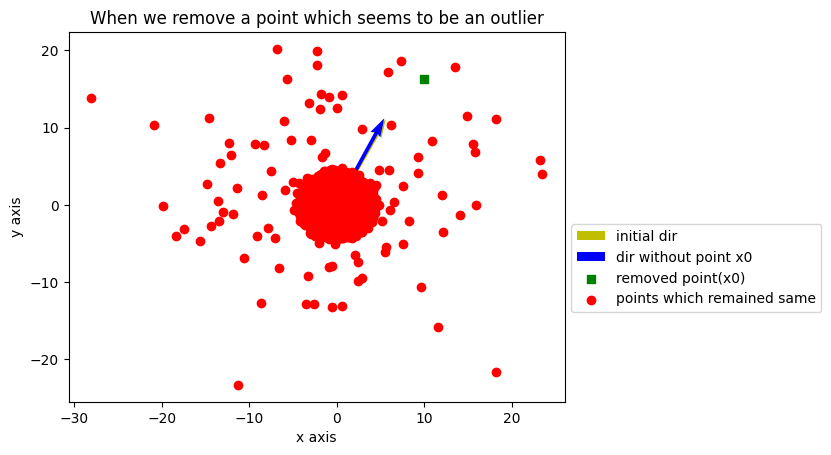

In [ ]:
# plotting the change in principal direction after removal of one data_large point(when removed point is of mean 0 and std 10)
np.random.seed(seed)
plt.quiver(0, 0, prin_dir[0], prin_dir[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0, prin_dir_rem[0], prin_dir_rem[1], color='b', scale=5,label='dir without point x0 ')
plt.scatter(data_large[0][len(data_large)-np.random.randint(1,10)],data_large[1][len(data_large)-np.random.randint(1,10)],color='g',marker=',',label='removed point(x0)')

plt.scatter(data_df[0],data_df[1],color='r',label='points which remained same')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('When we remove a point which seems to be an outlier')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

$ \text{Hence we can see that as the data size is very large then in such condition principal direction does not differs from initial condtion even it is} \\ \text{ an outlier.}$

$\large \text{Oversampling:}$

In [ ]:
data_large

,0,1,label
0,0.243835,-0.747318,1
1,-1.561177,-0.464253,1
2,-0.352062,-1.281492,1
3,0.289299,0.980029,1
4,0.477924,0.450818,1
...,...,...,...
1000095,10.851192,8.332475,0
1000096,-4.985805,2.969990,0
1000097,2.853970,-9.454233,0
1000098,9.983801,-4.398326,0


In [ ]:
data_large.mean()

0       -0.002510
1        0.000151
label    0.999900
dtype: float64

In [ ]:
data_X=data_large[data_large.columns[:-1]]
data_X

,0,1
0,0.243835,-0.747318
1,-1.561177,-0.464253
2,-0.352062,-1.281492
3,0.289299,0.980029
4,0.477924,0.450818
...,...,...
1000095,10.851192,8.332475
1000096,-4.985805,2.969990
1000097,2.853970,-9.454233
1000098,9.983801,-4.398326


In [ ]:
Q_mat_init=compute_Q(np.array(data_X))
mu_init=np.array(data_X.mean())
prin_dir_init=compute_principal_direc_power(Q_mat_init) # initial principal direction without oversampling
# now we will use our method to find the principal direcion for data after oversampling of a specific data point
r=0.1 #we will oversample datapoint 10 % of the data
# first data point which comes from 2d guass(0,10)
data_point_1=np.array(data_X.iloc[-1])
m=1+r
mu_1=((mu_init)+r*data_point_1)/m
cov_mat=(Q_mat_init/m)+((r/m)*np.outer(data_point_1,data_point_1))-np.outer(mu_1,mu_1)
# finding principal direction
prin_dir_1=compute_principal_direc_power(cov_mat)
# second data point which comes from 2d guass(0,1)
data_point_2=np.array(data_X.iloc[1])
m=1+r
mu_2=((mu_init)+r*data_point_2)/m
cov_mat=(Q_mat_init/m)+((r/m)*np.outer(data_point_2,data_point_2))-np.outer(mu_2,mu_2)
# finding principal direction
prin_dir_2=compute_principal_direc_power(cov_mat)
data_rem=data_X.drop([1,len(data_X)-1])


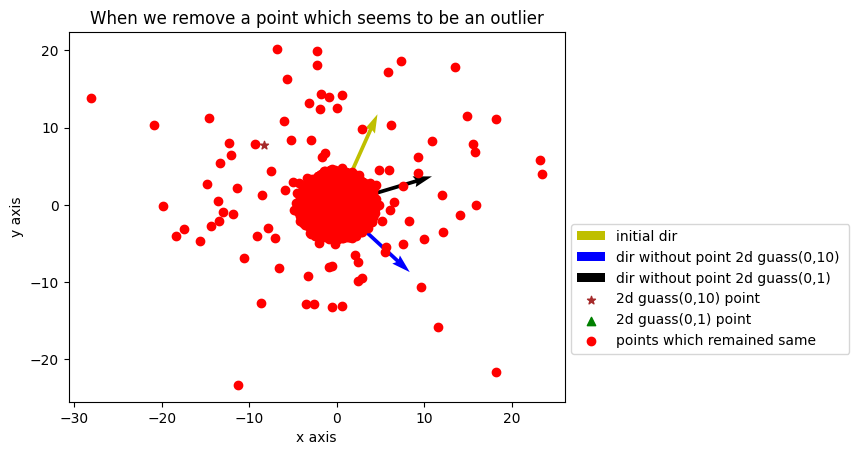

In [ ]:
plt.quiver(0, 0, prin_dir_init[0], prin_dir_init[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0,prin_dir_1[0], prin_dir_1[1], color='blue', scale=5,label='dir without point 2d guass(0,10) ')
plt.quiver(0, 0,prin_dir_2[0], prin_dir_2[1], color='black', scale=5,label='dir without point 2d guass(0,1)')
plt.scatter(data_point_1[0],data_point_1[1],color='brown',marker='*',label='2d guass(0,10) point')
plt.scatter(data_point_2[0],data_point_2[1],color='green',marker='^',label='2d guass(0,1) point')
plt.scatter(data_rem[0],data_rem[1],color='r',label='points which remained same')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('When we remove a point which seems to be an outlier')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

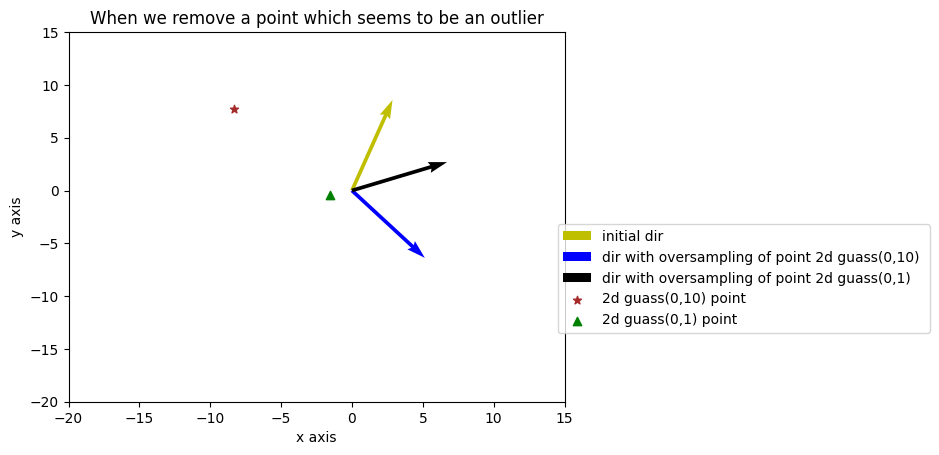

In [ ]:
plt.quiver(0, 0, prin_dir_init[0], prin_dir_init[1], color='y', scale=5,label='initial dir ')
plt.quiver(0, 0,prin_dir_1[0], prin_dir_1[1], color='blue', scale=5,label='dir with oversampling of point 2d guass(0,10) ')
plt.quiver(0, 0,prin_dir_2[0], prin_dir_2[1], color='black', scale=5,label='dir with oversampling of point 2d guass(0,1)')
plt.scatter(data_point_1[0],data_point_1[1],color='brown',marker='*',label='2d guass(0,10) point')
plt.scatter(data_point_2[0],data_point_2[1],color='green',marker='^',label='2d guass(0,1) point')
#plt.scatter(data_rem[0],data_rem[1],color='r',label='points which remained same')
plt.xticks(np.arange(-20,20, step=5))
plt.yticks(np.arange(-20,20, step=5))
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('When we remove a point which seems to be an outlier')
plt.legend(bbox_to_anchor=(1.75,0.5))
plt.show()

In [ ]:
def OPCAOD(dat,r=0.1):
  start=timer()
  n=len(dat) # number of data points
  dim=dat.shape[1]
  #data_score={}
  Q_mat_init=compute_Q(np.array(dat))
  mu_init=np.array(dat.mean())
  prin_dir_init=compute_principal_direc_power(Q_mat_init)
  #prin_dir_list=[]
  #cosine_sim_list=[]
  outlier_score_list=[]
  m=(1+r)
  for i in range(len(dat)):
    mu=((mu_init)+r*np.array(dat.iloc[i]))/m

    data_point=np.array(dat.iloc[i])
    cov_mat=(Q_mat_init/m)+((r/m)*np.outer(data_point,data_point))-np.outer(mu,mu)
    # finding principal direction
    prin_dir=compute_principal_direc_power(cov_mat)
    #prin_dir_list.append(prin_dir)
    # finding cosine similiraty (cos theta)
    cosine_sim=compute_cosine( prin_dir_init,prin_dir)
    #cosine_sim_list.append(cosine_sim)
    # h
    outlier_score=(1-abs(cosine_sim))
    outlier_score_list.append(outlier_score)
    #data_score[tuple(dat.iloc[i])]=outlier_score


  end=timer()
  Sc=np.array(outlier_score_list)
  mean=Sc.mean()
  outlier_score_list=abs(Sc-mean)

  return prin_dir_init,outlier_score_list,end-start

In [ ]:
data

,0,1
0,0.243835,-0.747318
1,-1.561177,-0.464253
2,-0.352062,-1.281492
3,0.289299,0.980029
4,0.477924,0.450818
...,...,...
205,7.524434,-5.105718
206,-7.057521,-4.243173
207,-2.321621,18.151405
208,-20.947494,10.359561


In [ ]:
init_dir,score,time_taken=OPCAOD(data)

In [ ]:
print('time taken to solve is:',time_taken)

time taken to solve is: 0.31231122500000197


In [ ]:
dict_score=[]
for i in range(len(data)):
  dict_score.append((score[i],(data[0][i],data[1][i])))
dict_score.sort(reverse=True)


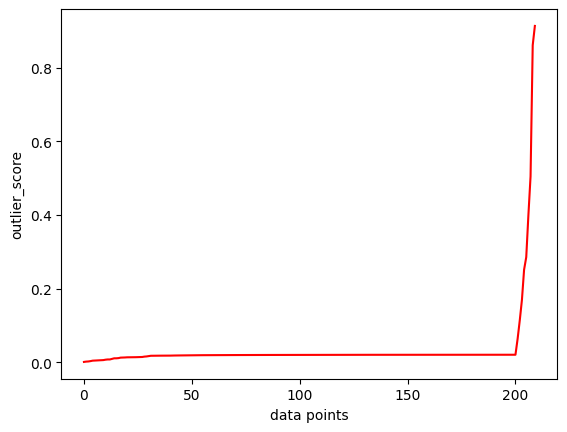

In [ ]:
score_rank=score.copy()
score_rank.sort()
plt.plot([i for i in range(len(score_rank))],score_rank,color='r',label='score')
plt.xlabel('data points')
plt.ylabel('outlier_score')
plt.show()

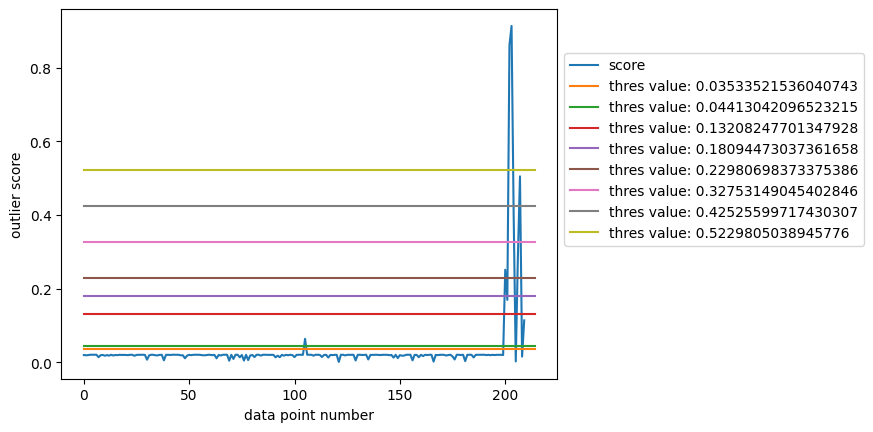

In [ ]:
k_values=[1e-2,1e-1,1,1.5,2,3,4,5]
thres=[np.mean(score)+i*np.std(score) for i in k_values]
plt.plot([i for i in range(len(data))],score,label='score')
for thr in thres:
  plt.plot([i for i in range(215)],[thr for i in range(215)],label=f'thres value: {thr}')
plt.xlabel('data point number')
plt.ylabel('outlier score')
plt.legend(bbox_to_anchor=(1,0.9))
plt.show()

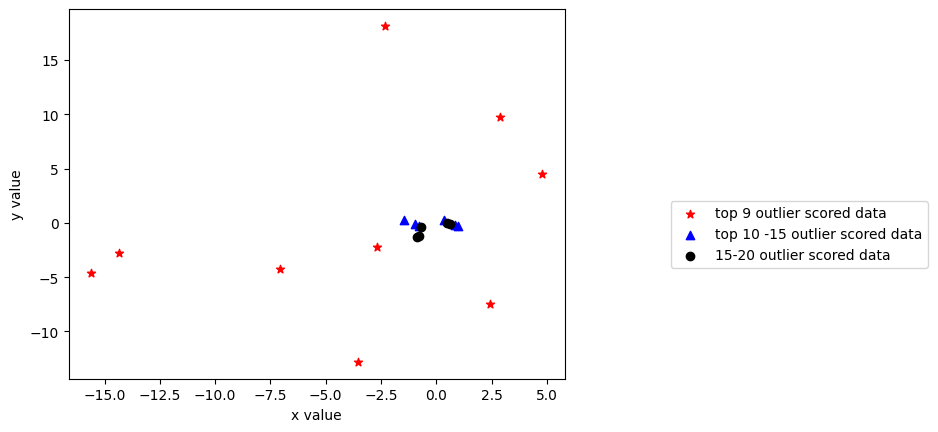

In [ ]:
plt.scatter([dict_score[i][1][0] for i in range(9)],[dict_score[i][1][1] for i in range(9)],label='top 9 outlier scored data',color='r',marker='*')
plt.scatter([dict_score[i][1][0] for i in range(9,15)],[dict_score[i][1][1] for i in range(9,15)],label='top 10 -15 outlier scored data',color='b',marker='^')
plt.scatter([dict_score[i][1][0] for i in range(15,20)],[dict_score[i][1][1] for i in range(15,20)],label='15-20 outlier scored data',color='k',marker='o')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

$\huge \text{Experiments for cross validation to find best k value:}$

In [ ]:
data_large_1=guass_2d(0,1,10000)
data_large_2=guass_2d(0,10,100)
data_large=pd.concat([data_large_1,data_large_2]).reset_index( drop=True)

In [ ]:
data_large['label']=[1 for i in range(10000)]+[0 for i in range(100)]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def compute_thres(score,k):
  a=np.array(score)
  return np.mean(a)+k*np.std(a)

In [ ]:
def compute_prediction(score,thres):
  pred=[]
  for i in range(len(score)):
    if score[i]<=thres:
      pred.append(1)
    else:
      pred.append(0)
  return pred

In [ ]:
def compute_accuracy(pred,actual):
  sum=0
  n=len(actual)
  m=list(actual).count(0)

  for i in range(n):
    if pred[i]==actual[i] and actual[i]==0:
      sum+=1
  return sum/m

In [ ]:
k_values=[0.001,0.01,0.1,1,2,3,4,5,6,7,8,9]
seeds=[98,45,32,56,78,43]

In [ ]:
data_X=data_large[data_large.columns[:-1]]
data_y=data_large[data_large.columns[-1]]

In [ ]:
score_train_list=[]
score_test_list=[]
y_test_list=[]

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(data_X,data_y, test_size=0.2, random_state=seed)
    data_train=pd.concat([X_train,y_train],axis=1)
    data_train.columns=[0,1,'label']
    X_train=data_train[data_train['label']==1][data_train.columns[:-1]]
    init_dir_train,score_train,time=OPCAOD(X_train)
    init_dir_test,score_test,time=OPCAOD(X_test)
    y_test_list.append(y_test)
    score_train_list.append(score_train)
    score_test_list.append(score_test)





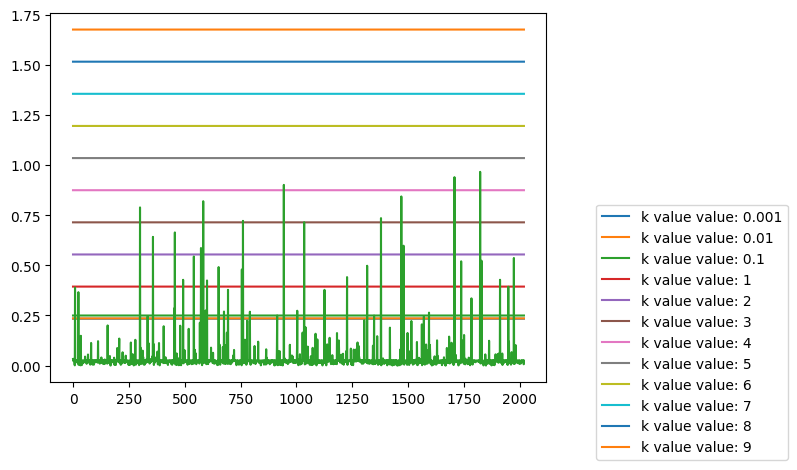

In [ ]:
thres=[]
for k in k_values:
  thres.append((compute_thres(score_train_list[1],k),k))
for thr in thres:
  plt.plot([i for i in range(len(score_test_list[1]))],[thr[0] for i in range(len(score_test_list[1]))],label=f'k value value: {thr[1]}')

plt.plot([i for i in range(len(score_test_list[1]))],score_test_list[0])
plt.legend(bbox_to_anchor=(1.5,0.5))


In [ ]:
mean_acc=[]
for k in k_values:
  print('\n when k is :',k,'\n******************************************')
  accuracy_seed=[]
  for j in range(len(seeds)):
     # computing threshold value
    thres=compute_thres(score_train_list[j],k)

    # prediction of test data
    y_pred=compute_prediction(score_test_list[j],thres)
    # computing the accuracy
    y_test=y_test_list[j].reset_index(drop=True)
    acc=compute_accuracy(y_pred,y_test)
    print('accuracy when seed is',seeds[j],'is :',acc)
    accuracy_seed.append(acc)

  print('k is:',k,'mean accuracy is:',np.mean(accuracy_seed))
  mean_acc.append(np.mean(accuracy_seed))

best_k=k_values[np.argmax(np.array(mean_acc))]
print('best k is:',best_k)


 when k is : 0.001 
******************************************
accuracy when seed is 98 is : 0.4166666666666667
accuracy when seed is 45 is : 0.5
accuracy when seed is 32 is : 0.35
accuracy when seed is 56 is : 0.5625
accuracy when seed is 78 is : 0.2916666666666667
accuracy when seed is 43 is : 0.2222222222222222
k is: 0.001 mean accuracy is: 0.3905092592592592

 when k is : 0.01 
******************************************
accuracy when seed is 98 is : 0.4166666666666667
accuracy when seed is 45 is : 0.5
accuracy when seed is 32 is : 0.35
accuracy when seed is 56 is : 0.5625
accuracy when seed is 78 is : 0.2916666666666667
accuracy when seed is 43 is : 0.2222222222222222
k is: 0.01 mean accuracy is: 0.3905092592592592

 when k is : 0.1 
******************************************
accuracy when seed is 98 is : 0.375
accuracy when seed is 45 is : 0.4090909090909091
accuracy when seed is 32 is : 0.35
accuracy when seed is 56 is : 0.5625
accuracy when seed is 78 is : 0.2916666666666667
ac

$\large \text{Best k value obtained by cross validation : 0.001 }$